# MNIST classification using Convolutions


---



In [0]:
# Install Kears if its not already there
#! pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import ZeroPadding2D, Activation
from keras.models import Model
from keras import optimizers, losses
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import backend as K

Using TensorFlow backend.


In [0]:
K.set_image_data_format('channels_last')

Prepare data
* Read and reshape the images to have 1 channel
* Encode categories to one hot code


In [0]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()
trainImages = trainImages.reshape(trainImages.shape[0], trainImages.shape[1],
                                  trainImages.shape[2], 1)
trainImages = trainImages.astype(np.float32) / 255
testImages = testImages.reshape(testImages.shape[0], testImages.shape[1],
                                testImages.shape[2], 1)
testImages = testImages.astype(np.float32) / 255
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


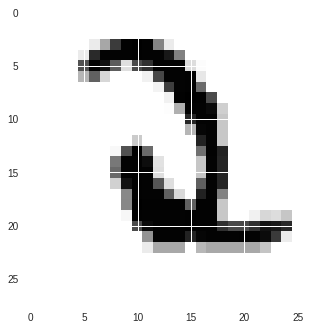

In [5]:
print(trainLabels[400])
plt.imshow(trainImages[400,:,:,0])
plt.show()

Build convolution model

In [0]:
def build_model(input_shape=(28, 28, 1), num_classes=10):
  X_input = Input(input_shape)
  Y = ZeroPadding2D((3,3))(X_input)
  
  # Convolution Block
  Y = Conv2D(32, kernel_size=(3,3), padding='valid')(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(64, kernel_size=(3,3), padding='valid')(Y)
  Y = Activation('relu')(Y)
  
  # Max pooling
  Y = MaxPooling2D(pool_size=(2,2))(Y)
  
  # Add drop out
  Y = Dropout(0.25)(Y)
  
  # Flatten
  Y = Flatten()(Y)
  
  # Fully connected network
  Y = Dense(128)(Y)
  Y = Activation('relu')(Y)
  Y = Dropout(0.25)(Y)
  Y = Dense(num_classes, activation='softmax')(Y)
  
  # Create model object
  model = Model(inputs=X_input, outputs=Y)
  
  return model

In [0]:
K.clear_session()
model = build_model()
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
history = model.fit(x=trainImages, y=trainLabels, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(testImages, testLabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.1841 - acc: 0.9438 - val_loss: 0.0467 - val_acc: 0.9842
Epoch 2/10
57472/60000 [===========================>..] - ETA: 0s - loss: 0.0576 - acc: 0.9827

60000/60000 [==============================] - 16s 259us/step - loss: 0.0571 - acc: 0.9828 - val_loss: 0.0382 - val_acc: 0.9877
Epoch 3/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0346 - val_acc: 0.9870
Epoch 4/10
30592/60000 [==============>...............] - ETA: 7s - loss: 0.0310 - acc: 0.9905

60000/60000 [==============================] - 16s 259us/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0307 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 16s 258us/step - loss: 0.0251 - acc: 0.9923 - val_loss: 0.0259 - val_acc: 0.9915
Epoch 6/10
25984/60000 [===========>..................] - ETA: 8s - loss: 0.0210 - acc: 0.9931

60000/60000 [==============================] - 16s 260us/step - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0297 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0180 - acc: 0.9940 - val_loss: 0.0313 - val_acc: 0.9909
Epoch 8/10
25216/60000 [===========>..................] - ETA: 8s - loss: 0.0192 - acc: 0.9940

60000/60000 [==============================] - 16s 258us/step - loss: 0.0175 - acc: 0.9943 - val_loss: 0.0356 - val_acc: 0.9903
Epoch 9/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.0316 - val_acc: 0.9922
Epoch 10/10
25216/60000 [===========>..................] - ETA: 8s - loss: 0.0122 - acc: 0.9962

60000/60000 [==============================] - 15s 257us/step - loss: 0.0128 - acc: 0.9960 - val_loss: 0.0379 - val_acc: 0.9901


Evaluate model performance

In [13]:
score = model.evaluate(testImages, testLabels)
print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

10000/10000 [==============================] - 2s 159us/step
Test loss: 0.03788170225611575
Test accuracy: 0.9901


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


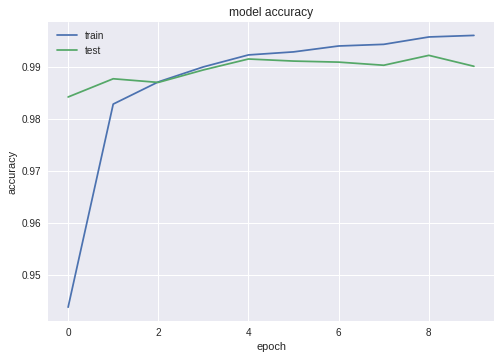

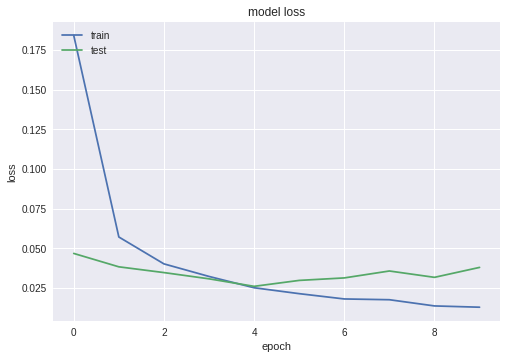

In [14]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()